<a href="https://colab.research.google.com/github/apresland/tensorflow-convnets/blob/histopathologic_cancer_detection/histopathologic_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histopathologic Cancer Detection

The goal of this project is to create an model to identify metastatic cancer in small image patches (96 x 96px) extracted from histopathologic scans of lymph node sections. Each image is annoted with a binary label indicating presence of metastatic tissue.

The histopathological images are microscope images of lymph nodes stained with hematoxylin and eosin producing blue, violet and red colors. Hematoxylin binds to negatively charged substances such as nucleic acids producing a dark blue coloration whereas eosin binds to positively charged substances like amino-acid side chains producing a pink coloration. Typically nuclei are stained blue, whereas cytoplasm and extracellular parts in various shades of pink.

Histological assessment of lymph node metastases is part of determining the stage of breast cancer. Lymph nodes are small glands that filter the fluid in the lymphatic system and they are the first place a breast cancer is likely to spread.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## Data visualization

Text(0, 0.5, 'Tumor tissue')

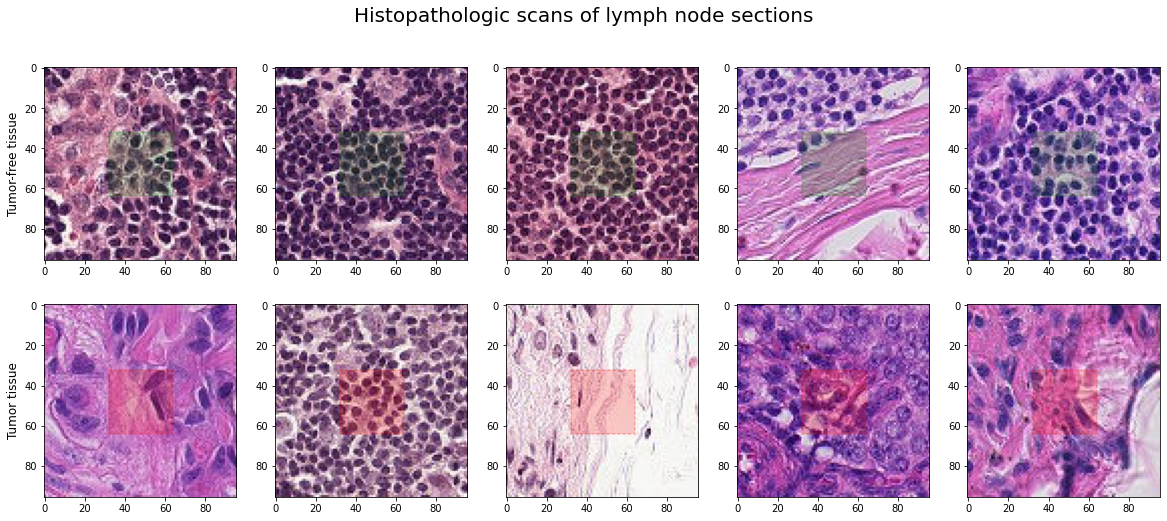

In [36]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)

negatives = [item for item in ds_train.take(100)  if item[1] == 0]
for i, (image, label) in enumerate(negatives[:5]):
  ax[0,i].imshow(image)
  box = patches.Rectangle((32,32),32,32,linewidth=2,edgecolor='g',facecolor='g', alpha=0.2, linestyle=':', capstyle='round')
  ax[0,i].add_patch(box)
ax[0,0].set_ylabel('Tumor-free tissue', size='large')

positives = [item for item in ds_train.take(100)  if item[1] == 1]
for i, (image, label) in enumerate(positives[:5]):
  ax[1,i].imshow(image)
  box = patches.Rectangle((32,32),32,32,linewidth=2,edgecolor='r',facecolor='r', alpha=0.2, linestyle=':', capstyle='round')
  ax[1,i].add_patch(box)
ax[1,0].set_ylabel('Tumor tissue', size='large')